In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Basic plots


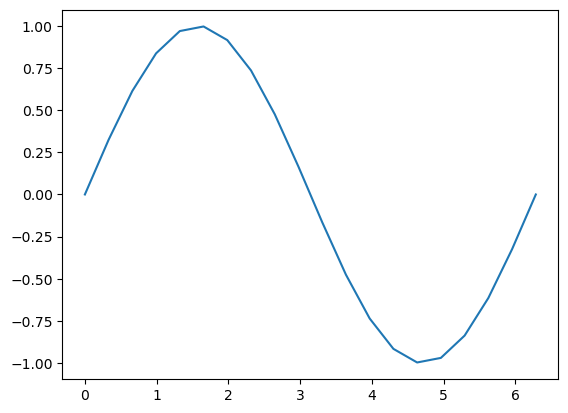

In [4]:
x = np.linspace(start=0, stop=2*np.pi, num=20)
y = np.sin(x)
plt.plot(x, y)

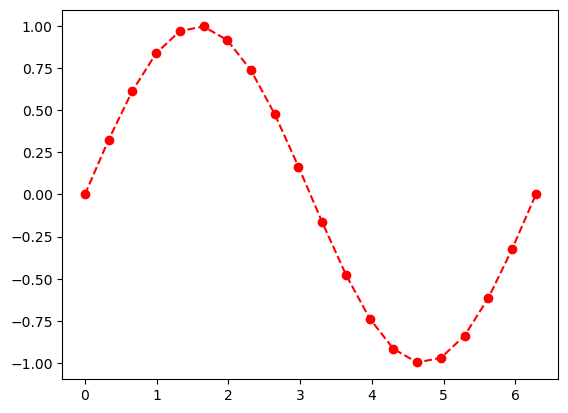

In [5]:
_ = plt.plot(x, y, 'o--r') # the '_ = ' prefix absorbs plt.plot()'s return value

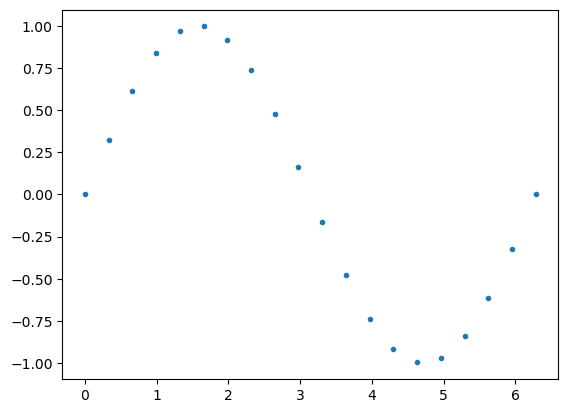

In [6]:
_ = plt.plot(x, y, '.')

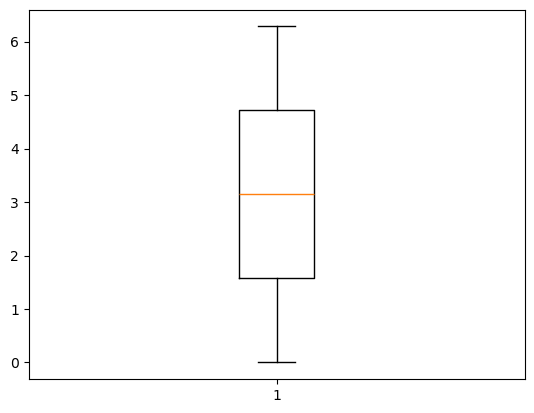

In [7]:
_ = plt.boxplot(x, vert=True)

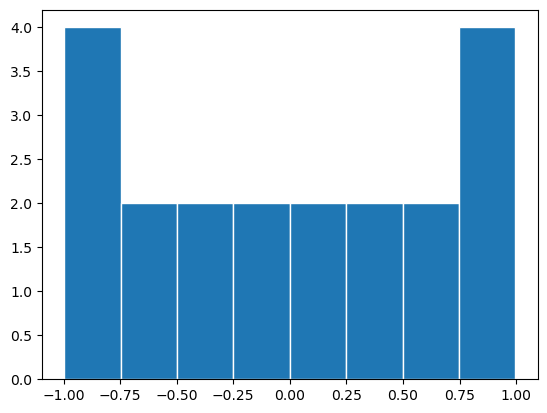

In [9]:
_ = plt.hist(x=y, bins=8, edgecolor='white')

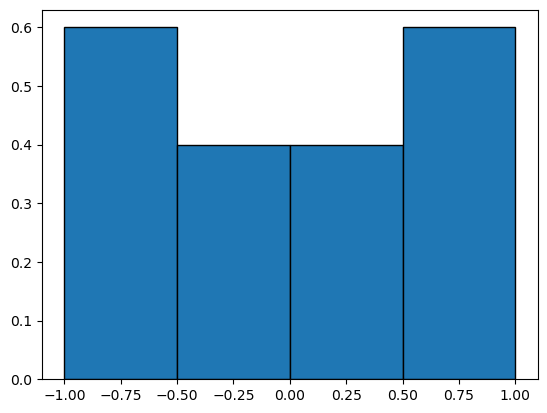

In [10]:
_ = plt.hist(x=y, bins=np.linspace(start=-1, stop=1, num=5), 
             edgecolor='black', density=True)

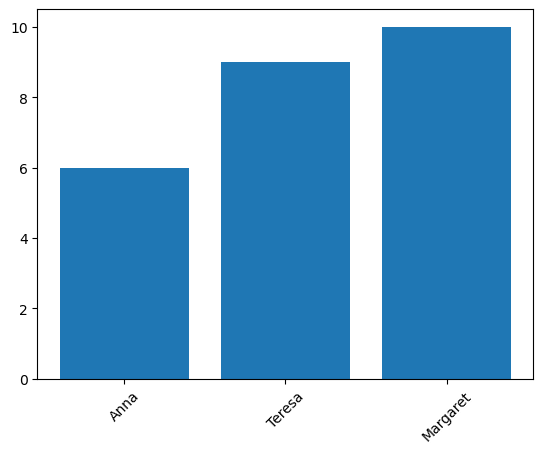

In [11]:
plt.bar(x=range(3), height=(6, 9, 10),
       tick_label=('Anna', 'Teresa', 'Margaret'))
_ = plt.xticks(rotation=45)

### Title, axis labels, text annotations, and axis limits


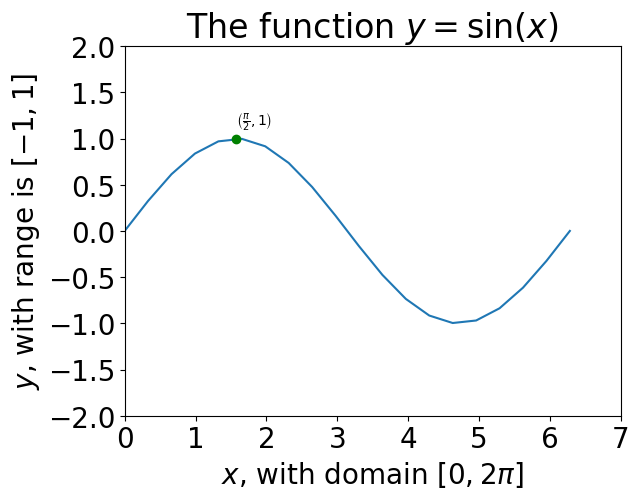

In [24]:
plt.rcParams.update({'font.size': 20}) # change all sizes from default 10 to 20
plt.plot(x, y, '-') # the following labels must be in current cell
plt.title(r'The function $y = \sin(x)$')
plt.xlabel(r'$x$, with domain $[0, 2 \pi]$')
plt.ylabel(r'$y$, with range is $[-1, 1]$')
plt.xlim(0, 7)
plt.ylim(-2, 2)
plt.rcParams.update({'font.size': 10}) # set back to default 10
plt.text(x=np.pi/2, y=1.15, s=r'$\left(\frac{\pi}{2}, 1\right)$')
plt.plot(np.pi/2, 1, 'og')
# Write a figure to a file; must be in same cell that made figure
plt.savefig('sinGraph.png')

### Legends


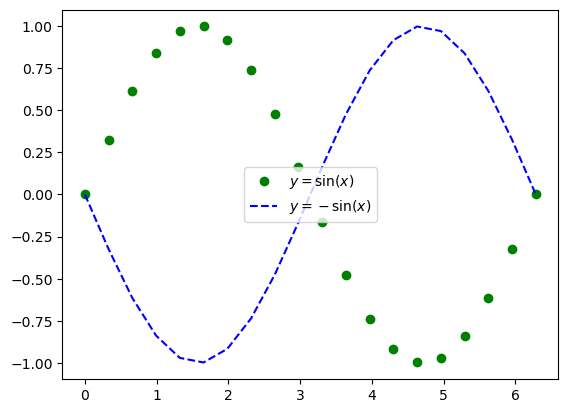

In [26]:
plt.plot(x, y, 'og', label=r'$y = \sin(x)$')
plt.plot(x, -y, '--b', label=r'$y=-\sin(x)$')
_ = plt.legend() # extracts line type and label from plt.plot() calls

### Multiple subplots within a plot


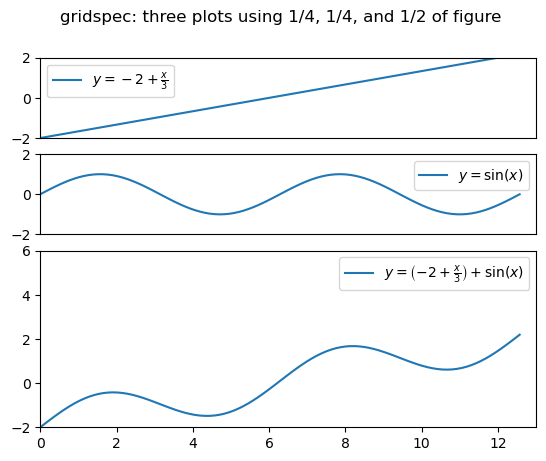

In [29]:
fig = plt.figure() # create new blank figure
fig.suptitle('gridspec: three plots using 1/4, 1/4, and 1/2 of figure')
gs = fig.add_gridspec(nrows=4, ncols=1) # grid of plot axes
x = np.linspace(start=0, stop=4*np.pi, num=100) # fake data
xlim = (0, 13) # common x-axis limits

ax1 = fig.add_subplot(gs[0, 0]) # first plot in top 1/4
ax1.plot(x, -2 + x/3, label=r'$y = -2 + \frac{x}{3}$')
ax1.set(xlim=xlim, ylim=(-2, 2))
ax1.xaxis.set_ticks([]) # suppress axis ticks & numbers
ax1.legend()

ax2 = fig.add_subplot(gs[1, 0]) # second plot in second 1/4
ax2.plot(x, np.sin(x), label=r'$y = \sin(x)$')
ax2.set(xlim=xlim, ylim=(-2, 2))
ax2.xaxis.set_ticks([]) # suppress axis ticks & numbers
ax2.legend()

ax3 = fig.add_subplot(gs[2:4, 0]) # third plot in bottom 1/2
ax3.plot(x, (-2 + x/3) + np.sin(x),
         label=r'$y=\left(-2 + \frac{x}{3}\right) + \sin(x)$')
ax3.set(xlim=xlim, ylim=(-2, 6))
_ = ax3.legend()

### Plots of several variables from a pandas DataFrame


In [31]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/DJIA.csv', index_col='Symbol')

In [32]:
df.groupby('Exchange')['AvgVol'].describe() # summarize the data before making some plots

,count,mean,std,min,25%,50%,75%,max
Exchange,,,,,,,,
NASDAQ,7.0,3.037571e+07,3.534922e+07,3110000.0,5035000.0,23770000.0,36060000.0,103560000.0
NYSE,23.0,8.476522e+06,5.674615e+06,1580000.0,3880000.0,7120000.0,11660000.0,23190000.0


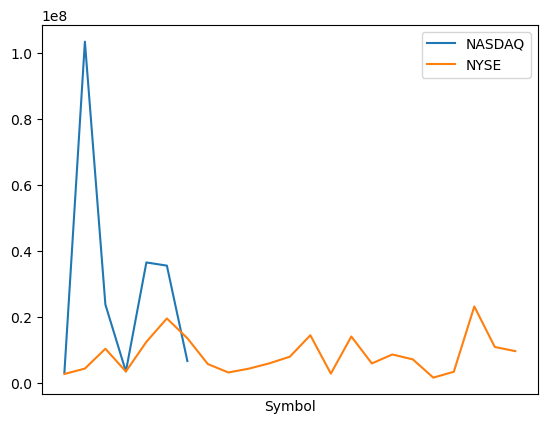

In [33]:
df.groupby('Exchange')['AvgVol'].plot.line(xticks=[]) # silly because x-axis is Symbol, not time;
# would be sensible if x-axis (from df.index) were e.g. dates
_ = plt.legend()

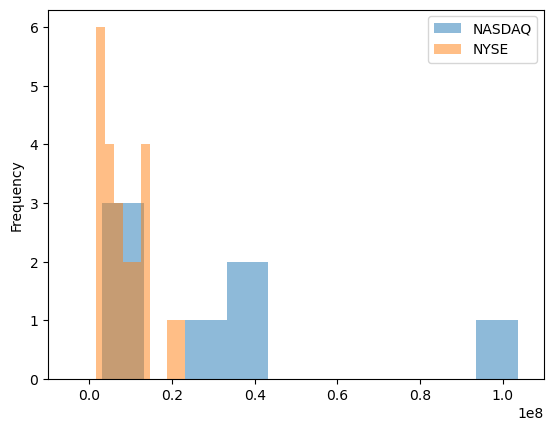

In [35]:
xlim = (-0.1e8, 1.1e8)
df.groupby('Exchange')['AvgVol'].plot.hist(xlim=xlim, alpha=.5)
_ = plt.legend()

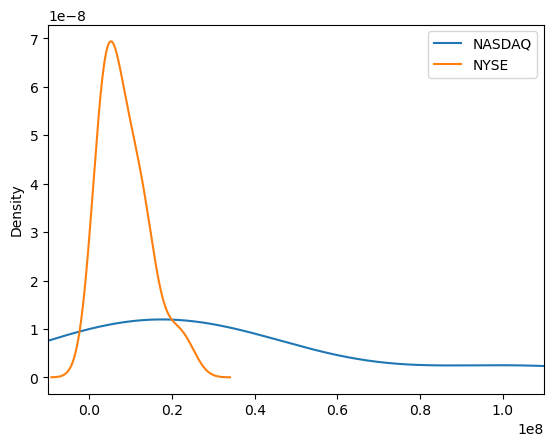

In [39]:
df.groupby('Exchange')['AvgVol'].plot.density(xlim=xlim)
_ = plt.legend()

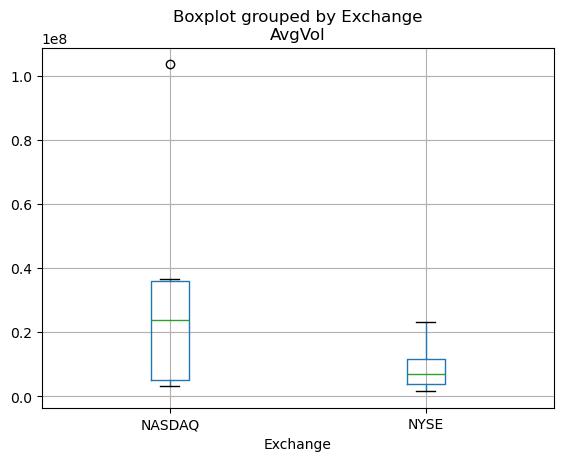

In [40]:
_ = df.boxplot(column='AvgVol', by='Exchange')

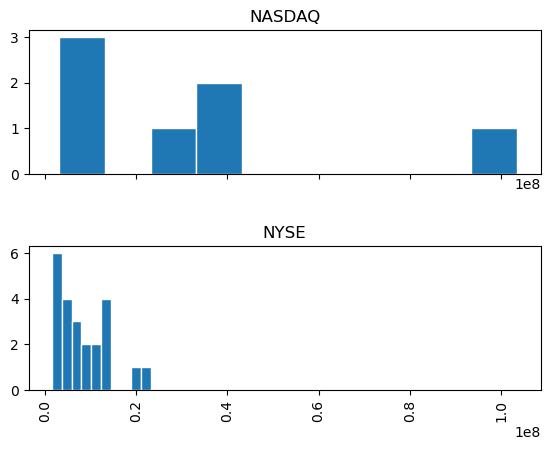

In [41]:
_ = df.hist(column='AvgVol', by='Exchange', bins=10, sharex=True,
        edgecolor='white', layout=(2, 1))

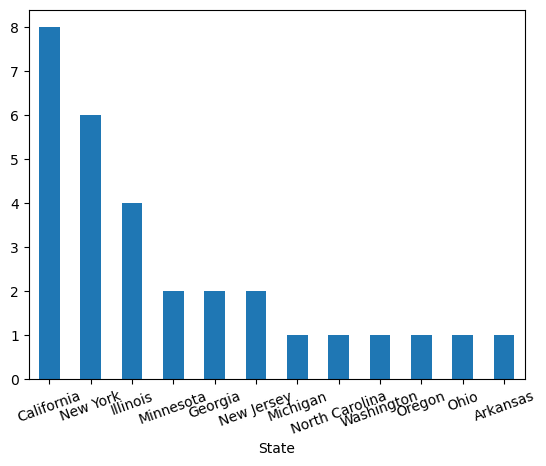

In [42]:
_ = df['State'].value_counts().plot.bar(rot=20) # try .barh()

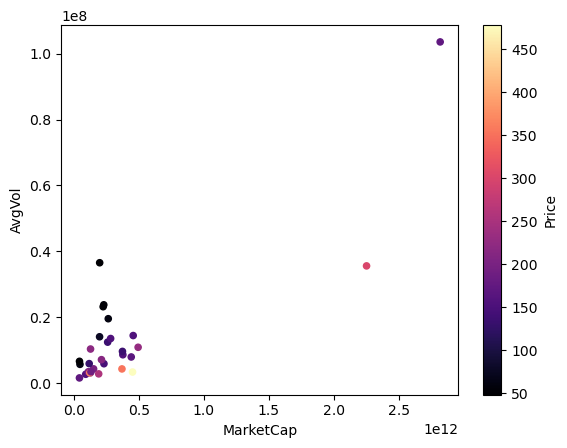

In [43]:
_ = df.plot.scatter(x='MarketCap', y='AvgVol', c='Price', cmap='magma') # cmap means 'colormap'

2.2.2


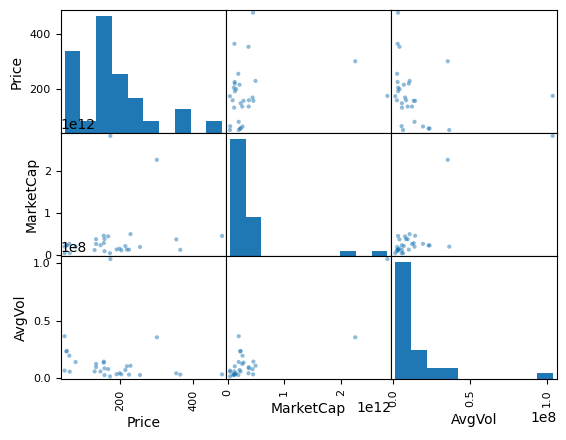

In [44]:
print(pd.__version__)
_ = pd.plotting.scatter_matrix(df[['Price', 'MarketCap', 'AvgVol']])

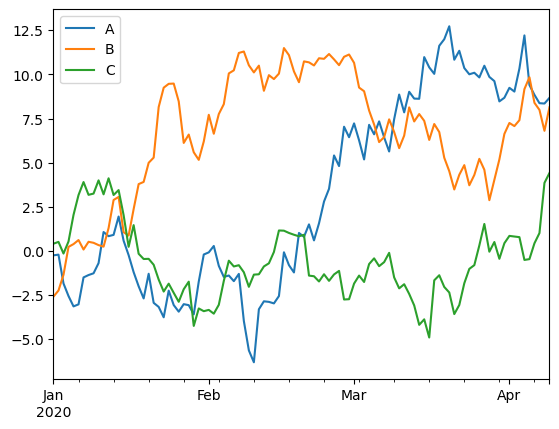

In [45]:
# make n_series fake time series to get data suitable for showing df.plot()
n_days = 100
df = pd.DataFrame(data=np.random.randn(n_days, 3), # random numbers from N(0, 1)
                  index=pd.date_range('1/1/2020', periods=n_days), # date sequence
                  columns=list('ABC'))
df = df.cumsum()
_ = df.plot()